# Predicting House Price per Unit Area based on the Number of Convenience Stores Nearby and Distance to the Nearest Metro Station

## Introduction

Real estate prices across the world have been increasing until the point where it is no longer affordable to live near large cities. Taipei alone has had a 70% increase in housing prices from 2005 to 2014 (Chen). Therefore, we wanted to make a regression model that would predict the reasonable cost of a house per unit area based on the most accurate predictors. This will give the buyers an idea of how much they should be paying for a property. 

Specifically, our question is **“According to the distance to the nearest metro station and number of convenience stores nearby, what is the price of a house per unit area in New-Taipei?”**

The data set we will be using contains real estate data from Sindian Dist., New Taipei City, Taiwan from 2012-2013. This data sets contains 7 variables:

* Transaction date
* House age (year)
* The distance to the nearest Metro station (metre) 
* The number of convenience stores nearby (in the living circle on foot)
* The geographic coordinate, latitude (degree)
* The geographic coordinate, longitude (degree)
* House price of unit area (10000 New Taiwan Dollar/Ping, where 1 Ping = 3.3 meter squared)

## Methods

### Loading Data into R

We will begin our preliminary exploratory analysis on the real estate valuation data by loading the libraries we need including `tidyverse`, `tidymodels`,`repr`,`readxl`, and `GGally` libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

After loading the necessary libraries, we downloaded the Excel file containing the real estate valuation data using the R function, `download.file` and uploaded the file into our current working directory on the jupyterhub server.

Following this, we read the Excel file into R using the `read_excel` function from the `readxl` R package.

In [2]:
url <- "https://github.com/datascience-100/real-estate-valuation-data/blob/main/Real%20estate%20valuation%20data%20set.xlsx?raw=true"
download.file(url, destfile = "real_estate_valuation_data.xlsx")

real_estate_val <- read_excel(path = "real_estate_valuation_data.xlsx")
head(real_estate_val)

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


Table 1

### Wrangling and Cleaning the Data

Since the real estate valuation dataset was already in a tidy format, there is not a significant amount of wrangling and cleaning necessary. We only modified the column names by adding underscores between each word so that there would be no spaces in the column names. This not only makes them easier to read but allows us to easily manipulate the column names when performing our data analysis in R. 

In [3]:
colnames(real_estate_val) <- c("number_of_houses", "transaction_date", "house_age", "distance_to_the_nearest_MRT_station", "number_of_convenience_stores","latitude", "longitude", "house_price_per_unit_area")
head(real_estate_val)

number_of_houses,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_per_unit_area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


Table 2

Next, we used the `colSums` function to check to see if we had any missing values in our data set and there appears to be no missing values as shown below.

In [4]:
colSums(is.na(real_estate_val))

number_of_houses                    transaction_date 
                                  0                                   0 
                          house_age distance_to_the_nearest_MRT_station 
                                  0                                   0 
       number_of_convenience_stores                            latitude 
                                  0                                   0 
                          longitude           house_price_per_unit_area 
                                  0                                   0

### Preliminary Exploratory Data Analysis 

We were also interested in seeing how many rows of data we had to better guage how we would split our training and test data.

In [5]:
num_obs <- real_estate_val %>%
    select (number_of_houses) %>%
    tail(1)

num_obs

number_of_houses
<dbl>
414


We decided to use 75% of the data for training and 25% for testing. We chose these specific proportions because we wanted to ensure that our training data was large enough so we could create an accurate model but at the same time we wanted to get an accurate evaluation of the model's performance so the test data can not be very small either.

In [6]:
set.seed(1234)

real_estate_val_split <- initial_split(real_estate_val, prop = 0.75, strata = house_price_per_unit_area)
real_estate_val_train <- training(real_estate_val_split)
real_estate_val_test <- testing(real_estate_val_split)


Next, we wanted to determine the relationship between the different variables we were interested in using for our data analysis. In order to do this, we plotted the variables of interest using the `ggpairs` function from the `GGally` package.

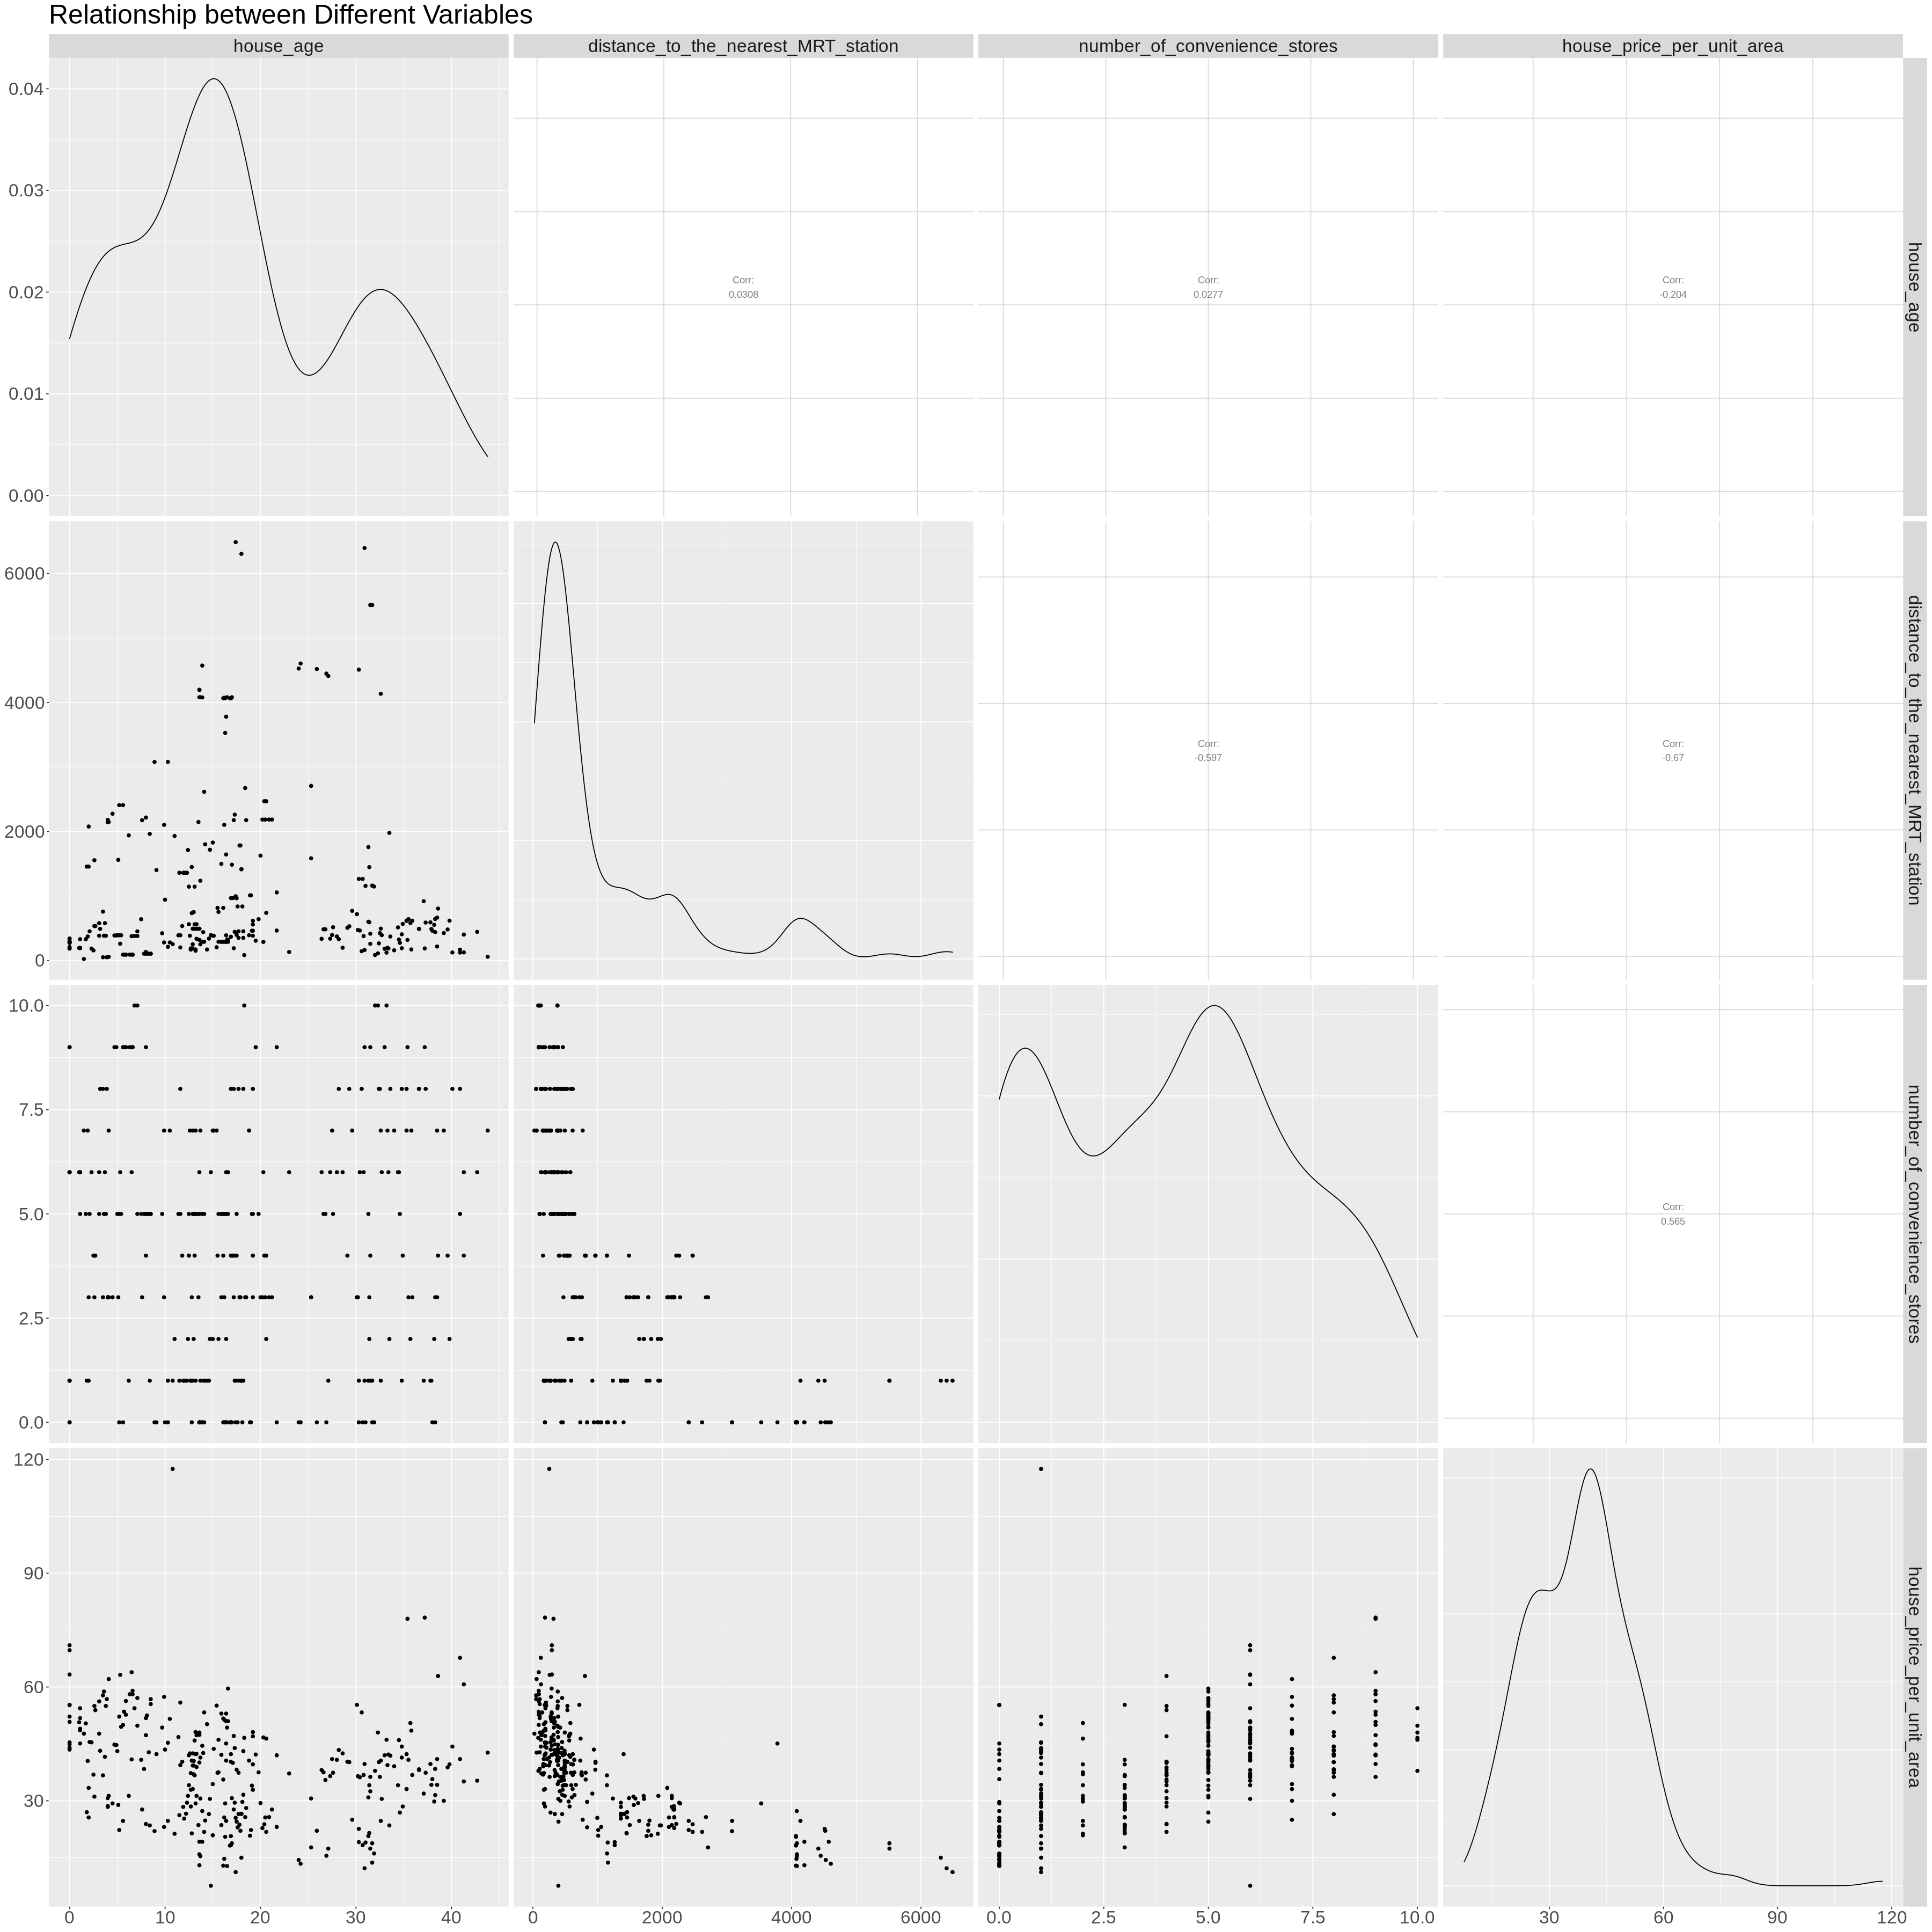

In [7]:
options(repr.plot.width = 30, repr.plot.height = 30)
plot_pairs <- real_estate_val_train %>% 
  select("house_age", "distance_to_the_nearest_MRT_station", "number_of_convenience_stores", "house_price_per_unit_area") %>% 
  ggpairs(title="Relationship between Different Variables")+
  theme (text = element_text (size = 25))
plot_pairs

Matrix 1 

From the above plots, we found that as the number of convenience stores close to the house increases, the house price per unit area increases. Therefore, there is a moderately, positive relationship between these two variables.

Furthermore, there appears to be a moderately strong, negative relationship between the distance to the nearest metro station and house price per unit area.

Finally, there is a weak, negative relationship between house age and house price per unit area.

Since the number of convenience stores and the distance to the nearest metro station have a moderately strong relationship with the house price per unit area, these two predictors would be suitable candidates for creating our model.

Next, we wanted to determine the mean of our predictors and output to find out what a normal value for each column looks like.

In [8]:
mean_predictors <- real_estate_val_train %>% 
    select (number_of_convenience_stores, distance_to_the_nearest_MRT_station, house_price_per_unit_area) %>%
    map_df (mean)

mean_predictors

number_of_convenience_stores,distance_to_the_nearest_MRT_station,house_price_per_unit_area
<dbl>,<dbl>,<dbl>
4.166667,1062.774,37.97308


Table 3

We also wanted to see the distribution of the two predictors so we could learn more about how diverse our data set is with respect to these variables as this would influence the generalizability of the model.

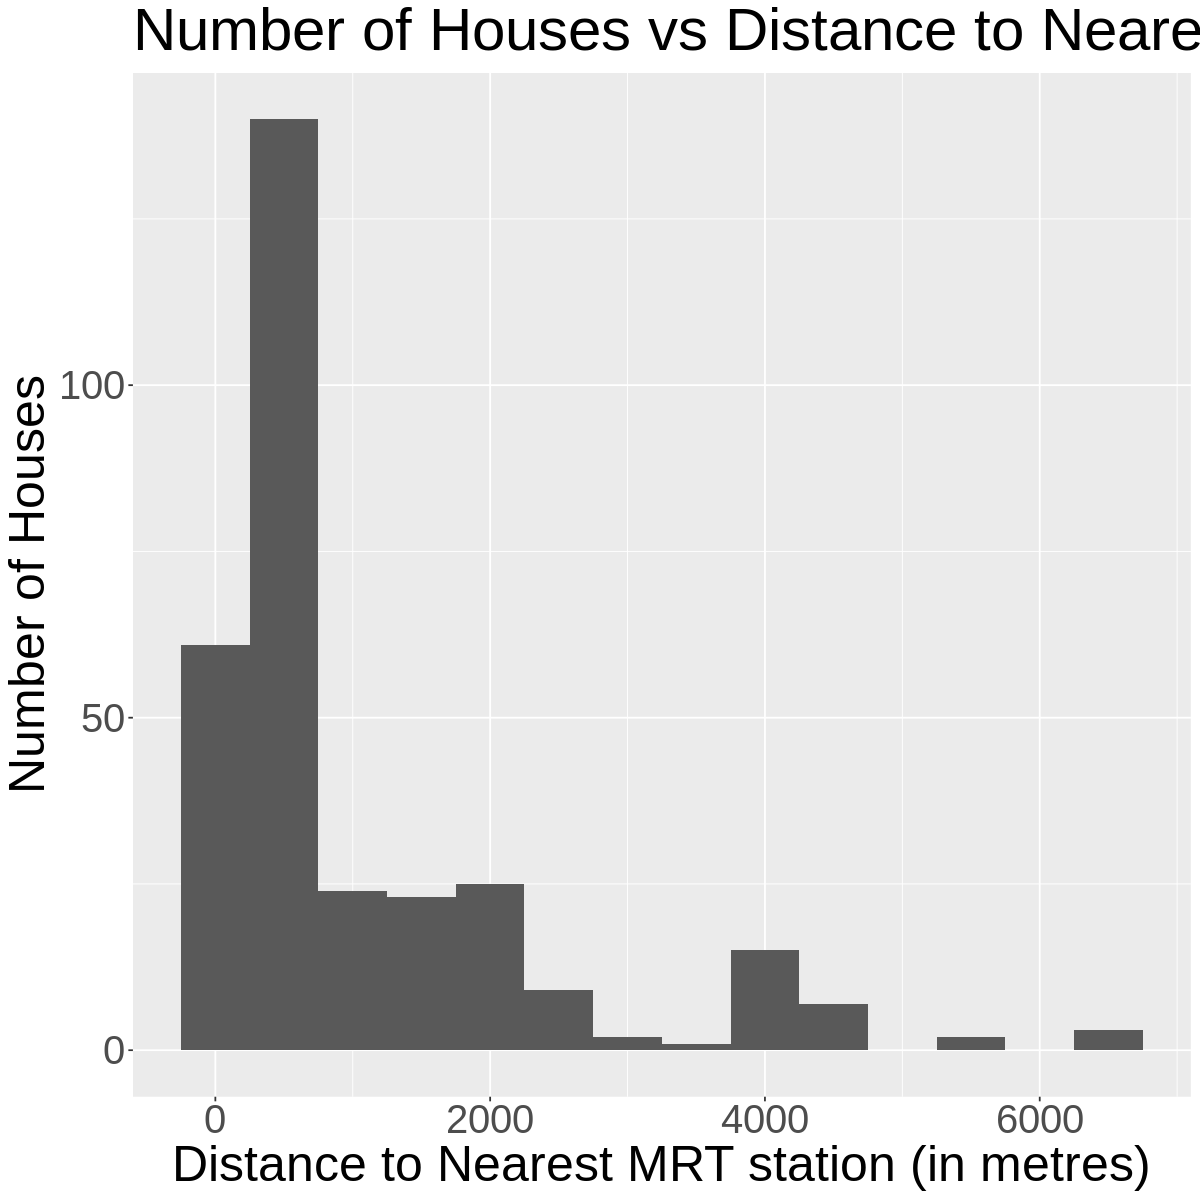

In [25]:
metro_station_histogram <- real_estate_val_train %>% 
    ggplot (aes(x=distance_to_the_nearest_MRT_station))+
    geom_histogram (binwidth = 500, position = "identity")+
    labs(x="Distance to Nearest MRT station (in metres)", y ="Number of Houses")+
    theme (text = element_text (size = 30))+
    ggtitle ("Number of Houses vs Distance to Nearest MRT station")


metro_station_histogram


Histogram 1

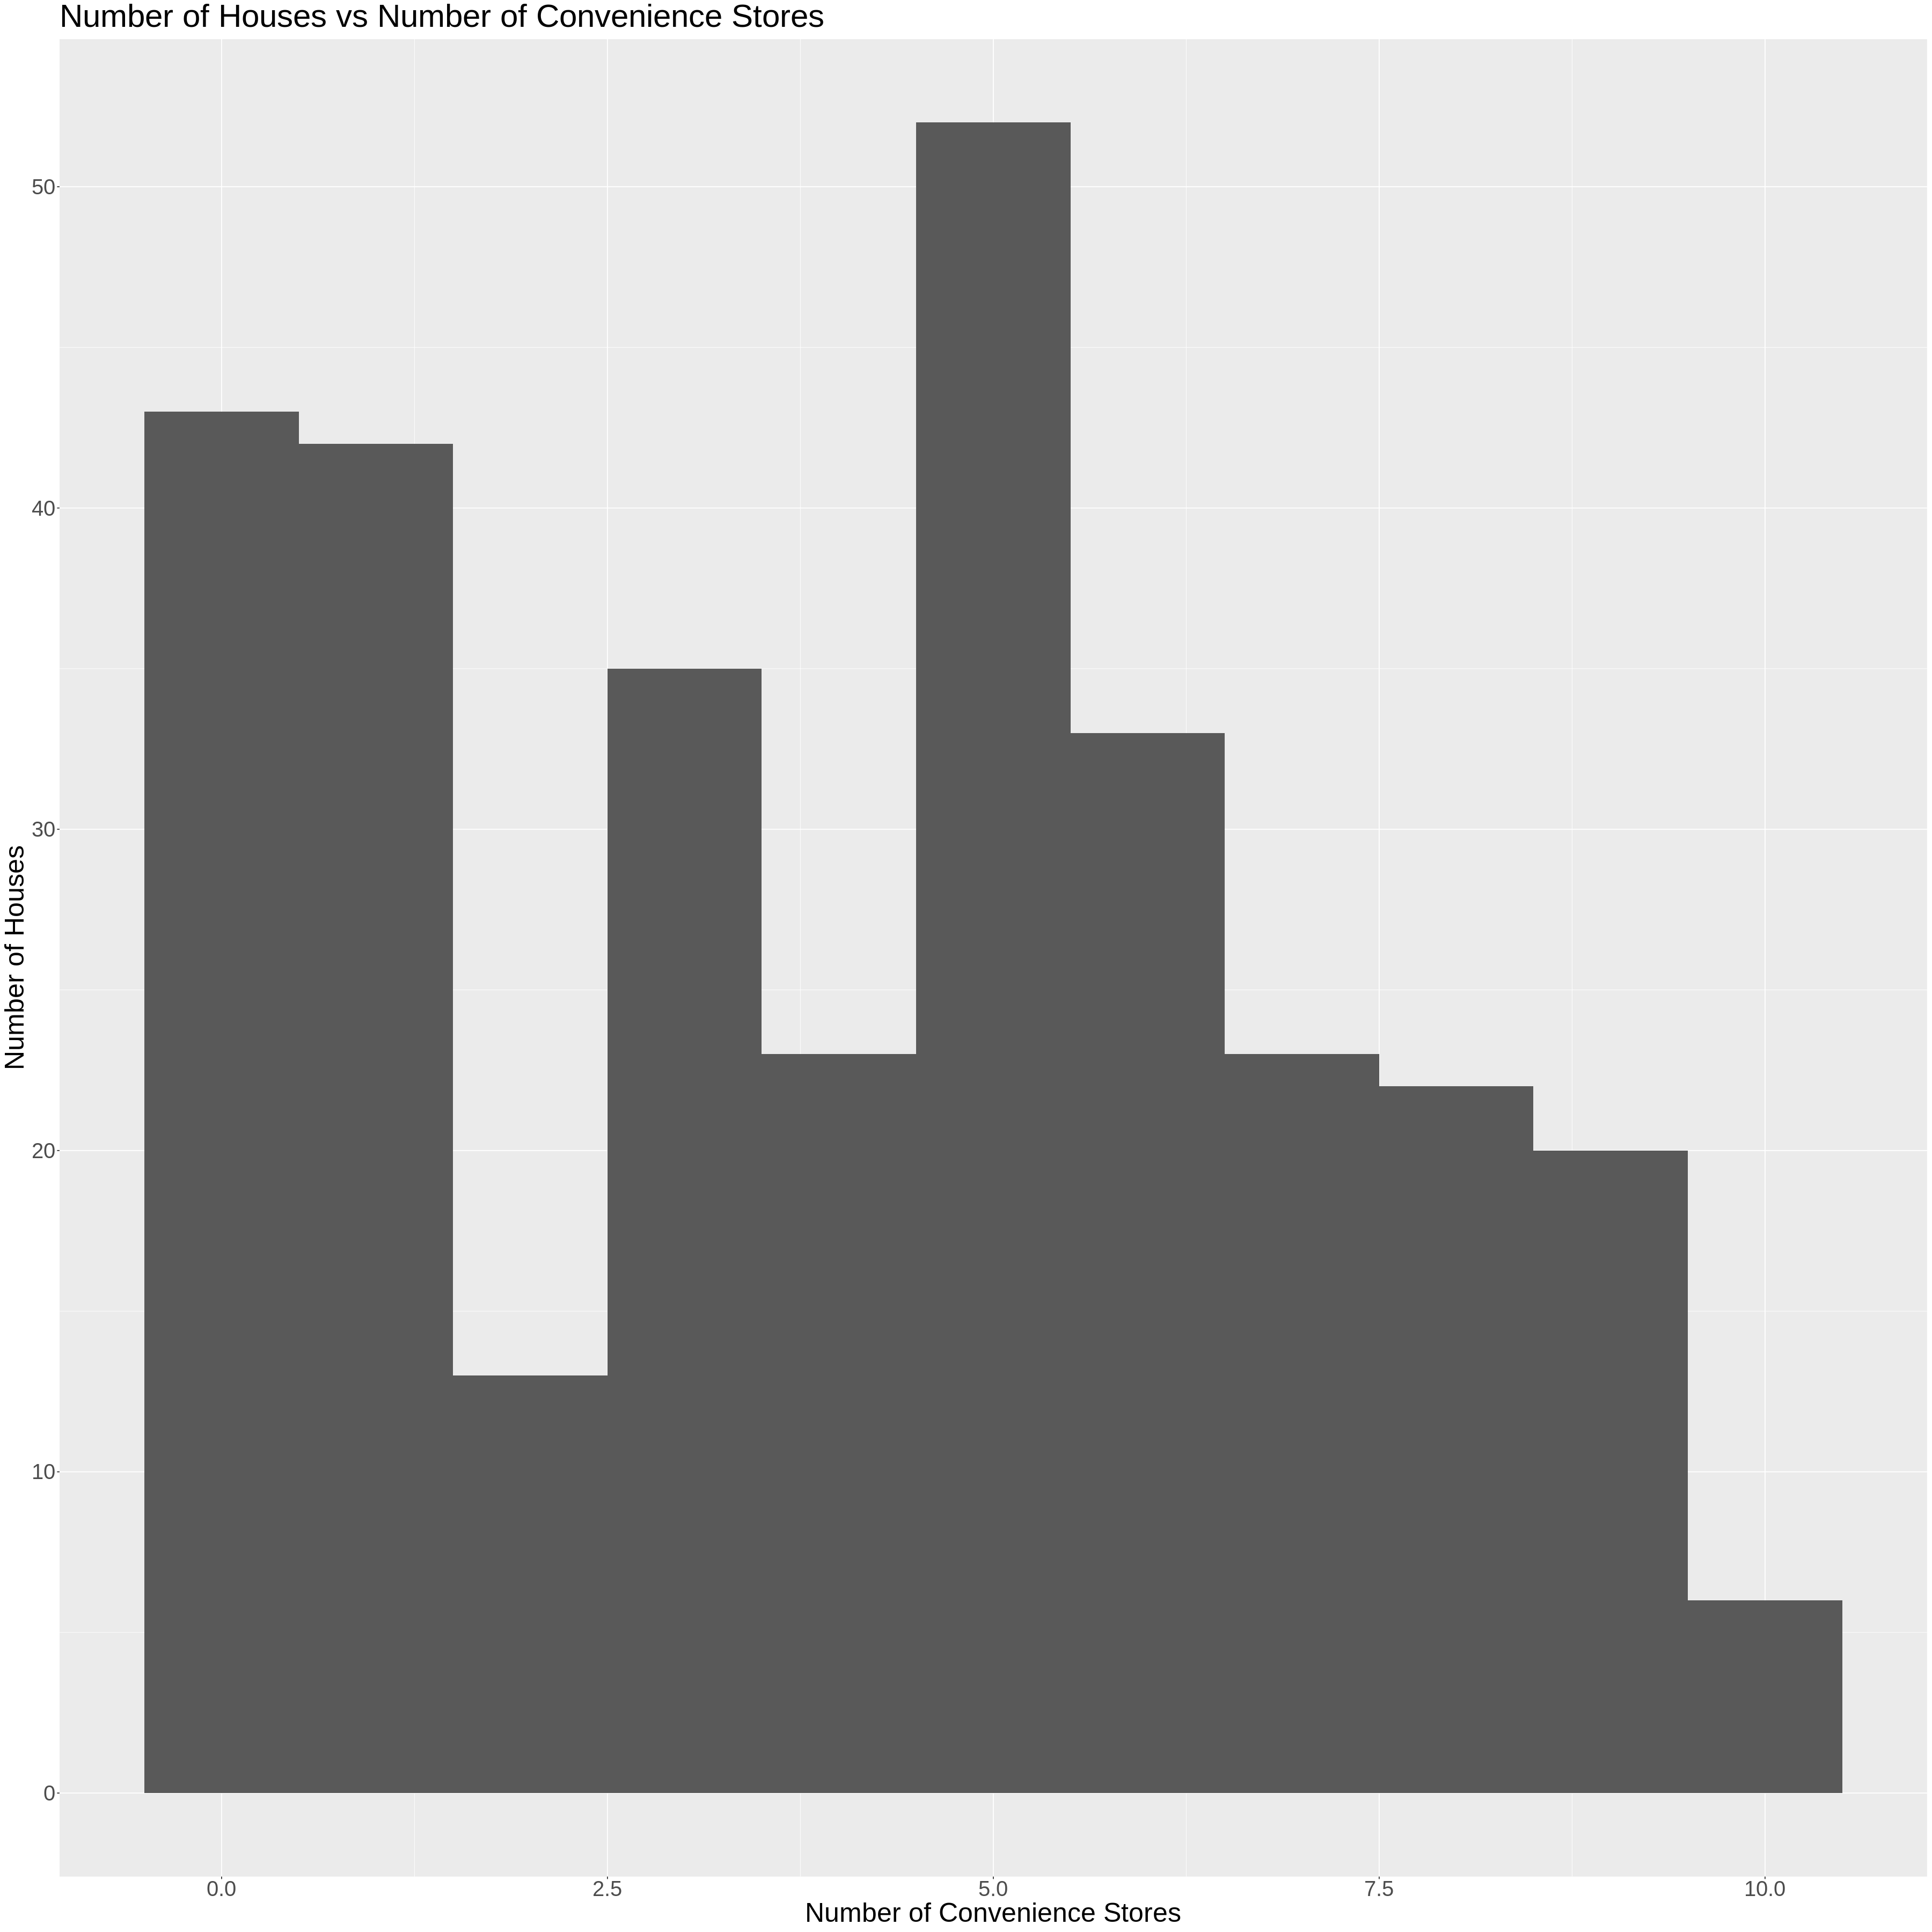

In [10]:
convenience_store_histogram <- real_estate_val_train %>% 
    ggplot (aes(x=number_of_convenience_stores))+
    geom_histogram (binwidth = 1,  position = "identity")+
    labs(x="Number of Convenience Stores", y ="Number of Houses")+
    theme (text = element_text (size =  30))+
    ggtitle("Number of Houses vs Number of Convenience Stores")

convenience_store_histogram

Histogram 2

### Data Analysis

As we wanted to create the most accurate model to predict the price of a house per unit area based on the distance to the nearest metro station and number of convenience stores nearby, we decided to perform both k-nn regression followed by a linear regression. Our goal is to choose the model that gives us the lowest RMSPE for our test dataset. We predict the k-nn regression model to give us a lower RMSPE because we are not extrapolating data outside of our training set.

### K-NN Regression

To begin the k-nn regression, we will create our model specification by calling the `nearest_neighbor`function. Since want to use the straight-line distance and want each of the K nearest neighbours to receive exactly one vote, we will set the `weight_function` to be rectangular. In terms of the neighbours because we will be using cross-validation to choose the best K, we will set `neighbours = tune()`. Furthermore, as this is a regression problem, we will use `set_mode("regression")` in our model specification and `set_engine("kknn")` since we are using the k-nearest neighbours.

In [11]:
real_estate_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("regression")



After creating our model specification, we will create a recipe in order to preprocess our data. For our recipe, we specify that our predictors are `number_of_convenience_stores` and `distance_to_the_nearest_MRT_station` and our response variable is `house_price_per_unit_area` and that we will be only using our training data. Next, we want to scale and center all the predictors so that we can prevent one variable (with much larger values) from dominating the selection of nearest neighbors.

In [12]:
real_estate_recipe <- recipe(house_price_per_unit_area ~ number_of_convenience_stores + distance_to_the_nearest_MRT_station, data = real_estate_val_train) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())
real_estate_recipe 


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Now, we will perform cross-validation with *10 folds* using the `vfold_cv` function. We chose to use 10 so that we have a lower standard error.

Then, we use the `workflow` function to combine our model specification and recipe.

In [13]:
real_state_vfold <- vfold_cv(real_estate_val_train, v = 5, strata = house_price_per_unit_area)


real_estate_workflow <- workflow() %>% 
    add_recipe(real_estate_recipe) %>% 
    add_model(real_estate_knn_spec) 

real_estate_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We want to use the RMSPE in order to the best K from our previous workflow. We will be testing 200 values of K.

The first step is creating a tibble that has a column named `neighbors` and this contains a sequence of values from 1 to 200. We have assigned this tibble to `gridvals`. 

Then, we tune our workflow so that it tests each of the values in `gridvals` and resamples using our cross-validation data set. 

Lastly, we collect the metrics from our model.

In [14]:
gridvals <- tibble(neighbors = seq(1, 200))

real_estate_results <- real_estate_workflow %>% 
    tune_grid(resamples = real_state_vfold, grid = gridvals) %>% 
    collect_metrics()

head(real_estate_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,9.6152461,5,0.99489228,Model001
1,rsq,standard,0.5602587,5,0.06584755,Model001
2,rmse,standard,8.9182179,5,1.00956377,Model002
2,rsq,standard,0.5953450,5,0.05902680,Model002
3,rmse,standard,9.2376900,5,0.87486925,Model003
3,rsq,standard,0.5700052,5,0.05046578,Model003


Table 4

We now need to find the *minimum* RMSPE as well as associated metrics including the mean and standard error. This will help is figure out the number of neighbors that will be best $K$ value. 

Following this, we use the `pull` function to pull the best `neighbors` value from `real_estate_min`

In [15]:
real_estate_min <- real_estate_results %>% 
    filter(.metric == "rmse") %>% 
    filter(mean == min(mean)) 
real_estate_min

k_min <- real_estate_min %>%
    pull(neighbors)

k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,8.804857,5,1.071024,Model007


[1] 7

Table 5

Now, we repeat the workflow analysis however this time we use a new model specification so that our  `neighbors` is equal to the 5 (i.e. the best K value). 

Next, we create a workflow to combine the new model specification and the recipe. We also fit the training data to our new model.

Finally, we use the `predict` function in order to make predictions on our test data. Then, we use the `metrics` function to compute a summary our regression model's quality.

In [16]:
real_estate_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 
                        k_min) %>% 
                        set_engine("kknn") %>% 
                        set_mode("regression")

real_estate_best_fit <- workflow() %>% 
                        add_recipe(real_estate_recipe) %>% 
                        add_model(real_estate_best_spec) %>% 
                        fit(data = real_estate_val_train) 

real_estate_summary <- real_estate_best_fit %>% 
                        predict(real_estate_val_test) %>% 
                        bind_cols(real_estate_val_test) %>% 
                        metrics(truth = house_price_per_unit_area, estimate = .pred)

real_estate_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,8.0150033
rsq,standard,0.6541409
mae,standard,5.8847339


Table 6

### Linear Regression

We start by creating a new model specification so that this time we are using the linear regression model, instead of k-nn, and using the `lm` engine as well as the `regression` mode.


In [17]:
real_estate_regression_spec <- linear_reg() %>%
           set_engine("lm") %>%
           set_mode("regression")

We also create a new recipe using the appropriate predictors and response varaibles. We also note that linear regression does not require scaled variables. 

In [18]:
real_estate_recipe <- recipe(house_price_per_unit_area ~ 
                             distance_to_the_nearest_MRT_station +
                             number_of_convenience_stores, 
                             data = real_estate_val_train)

We then create a workflow to combine the model and the recipe, as well as fit the data to our new model. 

In [19]:
real_estate_regression_fit <- workflow() %>%
          add_model(real_estate_regression_spec) %>%
          add_recipe(real_estate_recipe) %>%
          fit(data = real_estate_val_train)
real_estate_regression_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
                        (Intercept)  distance_to_the_nearest_MRT_station  
                          38.755947                            -0.005495  
       number_of_convenience_stores  
                           1.213741  


So, according to our regression fit, the best fit plane formula is: $house\: price \: (per unit area) = 38.755947 − 0.005495* distance\: to\: the\: nearest \:metro \:station\: +  1.213741* number\: of\: convenience \:stores\: $


Finally, we use the best fit plane from our fit to predict values from our test data and then comparing them using 
the metrics function to find the RMSPE of our best fit plane.

In [20]:
real_estate_regression_results <- real_estate_regression_fit %>%
                predict(real_estate_val_test) %>%
                bind_cols(real_estate_val_test) %>%
                metrics(truth = house_price_per_unit_area, estimate = .pred)
real_estate_regression_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.2839991
rsq,standard,0.5176801
mae,standard,6.9271139


Table 7

### Visualizations for KNN-Regression Model

Since the k-nn regression model gave us a lower RMSPE test error of 8.0150033 as compared to the linear regression model, 9.2839991, we will use it as our main model for predicting house price based on number of convenience stores and distance to the nearest metro station. We will now visualize our model's predictions so that we can evaluate the model's performance. 

As we used two predictors for our k-nn regression model, we simply cannot visualize our model using one scatterplot. We also did not want to use a 3-D plot because of the difficulties with interpreting the data points and due to the very fact that humans have a hard time understanding them. Therefore, we decided to make multiple scatterplots to visualize.


We began by creating a new dataframe that includes the predictions of our model, the number of convenience stores, the distance to the nearest metrostation, and the actual house price per unit area.


Then, we created our first scatterplot using our test data and our x value was the number of convenience stores and y was the house price per unit area. We overlayed this graph will our k-nn model in order to draw conclusions about how how well our model performed. 


In [27]:
options(repr.plot.width=10, repr.plot.height=10)

real_estate_val_test <- real_estate_val_test %>%
                       select (number_of_convenience_stores, distance_to_the_nearest_MRT_station, house_price_per_unit_area) 

real_estate_val_predictions <- real_estate_best_fit %>% 
                 predict(real_estate_val_test) %>% 
                 bind_cols(real_estate_val_test)

head(real_estate_val_predictions)


real_estate_knn_regression_1 <- real_estate_val_predictions %>%
                                ggplot(aes(x = number_of_convenience_stores, y = house_price_per_unit_area)) +
                                geom_point() +
                                geom_line(aes(y = .pred), color = "blue")+
                                labs (x = "Number of Convenience Stores", y ="House Price (per unit area)")+
                                ggtitle ("House Price vs Number of Convenience Stores")+
                                theme(text = element_text (size = 20))





.pred,number_of_convenience_stores,distance_to_the_nearest_MRT_station,house_price_per_unit_area
<dbl>,<dbl>,<dbl>,<dbl>
41.48571,5,561.9845,54.8
26.60000,3,2175.0300,32.1
36.28571,7,623.4731,40.3
36.51429,4,1164.8380,34.3
56.91429,6,292.9978,70.1
27.01429,1,1360.1390,24.6


Table 8

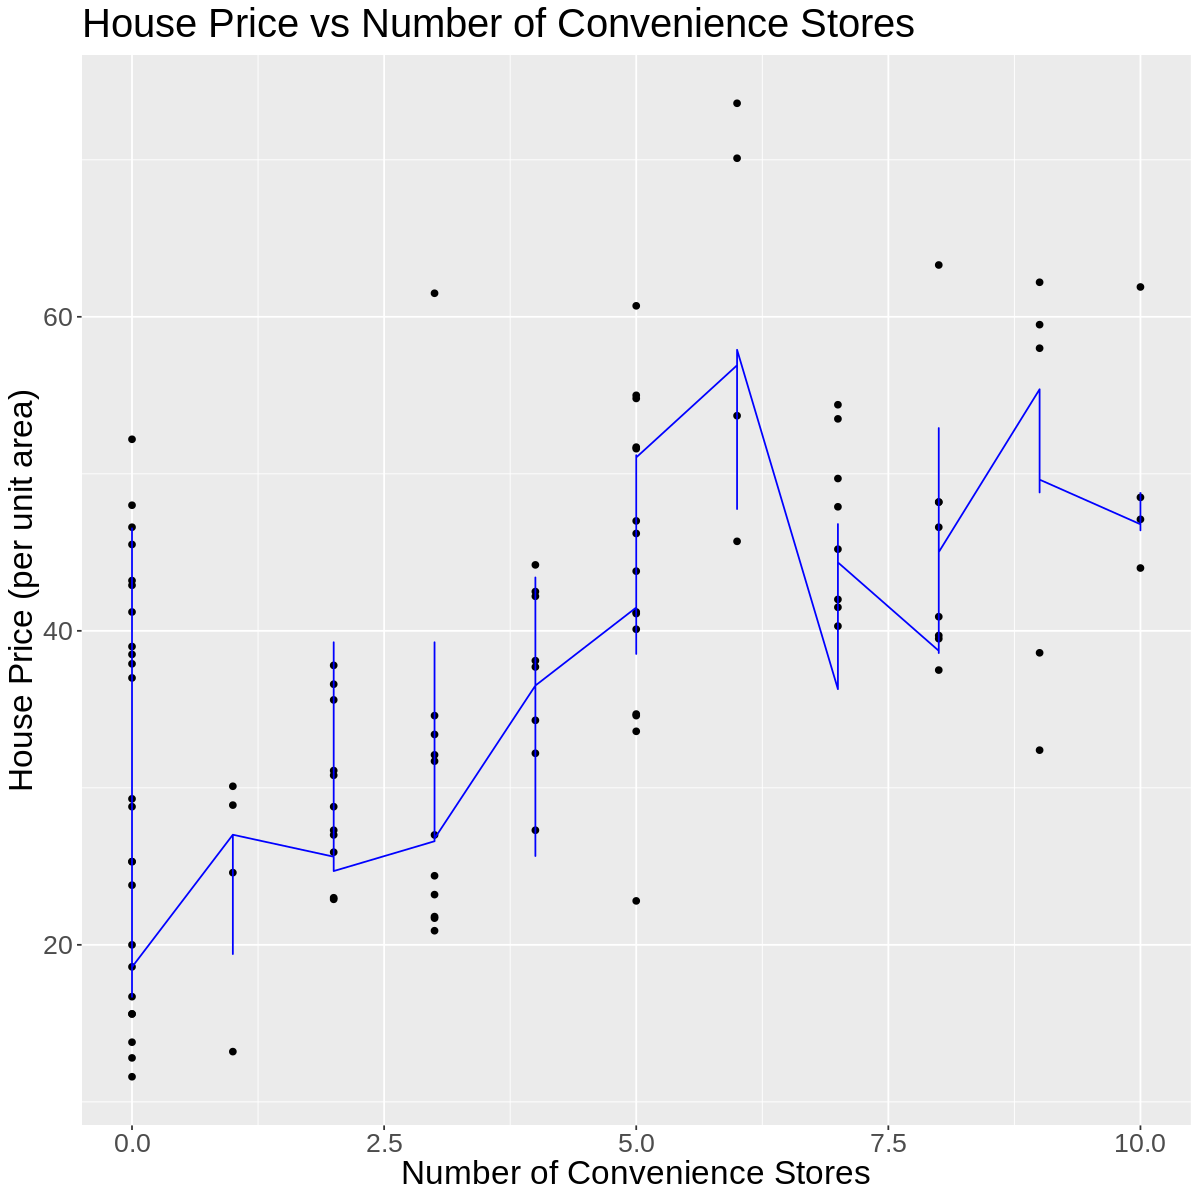

In [26]:
real_estate_knn_regression_1

Figure 1: House price per unit area vs Number of Convenience overlayed with the predicted house price per unit are based on the k-nn regression model (blue line).

From figure 1, we noticed that because the number of convenience stores is discrete and the number of convenience stores ranges from 1 to 10, we observe the multiple house prices for each number of convience store(s). In addition, this graph shows that we simply can not just use only the number of convenience stores to predict the house price per unit area. 

Furthermore, we were interested in cleaning this graph so that we could visualize the model's performance a little better. In order to do this, we decided to group by the number of convenience stores and find the actual mean house price. 

Once again, we overlayed this scatterplot with the predicted house price per unit area by our k-nn regression model, however this time we used the mean predicted house price per unit area.

In [30]:

real_estate_val_mean <- real_estate_val_predictions %>%
                        group_by(number_of_convenience_stores) %>%
                        mutate(mean_price = mean(house_price_per_unit_area), 
                        mean_pred_price = mean(.pred)) %>%
                        select (number_of_convenience_stores, mean_price, mean_pred_price)
                        head(real_estate_val_mean, n = 10)

real_estate_knn_regression_mean <- real_estate_val_mean %>%
                                   ggplot(aes(x = number_of_convenience_stores, y = mean_price)) +
                                   geom_point() +
                                   geom_line(aes(y = mean_pred_price), color = "blue") +
                                   labs (x = "Number of Convenience Stores", y ="Mean House Price (per unit area)")+
                                   ggtitle ("Mean House Price vs Number of Convenience Stores")+
                                   theme(text = element_text (size = 20))




number_of_convenience_stores,mean_price,mean_pred_price
<dbl>,<dbl>,<dbl>
5,43.92667,45.72571
3,30.20909,29.27792
7,46.81250,44.11429
4,37.31250,38.86071
6,60.77500,54.87143
1,24.20000,25.11429
7,46.81250,44.11429
2,29.70909,27.67662
5,43.92667,45.72571


Table 9 

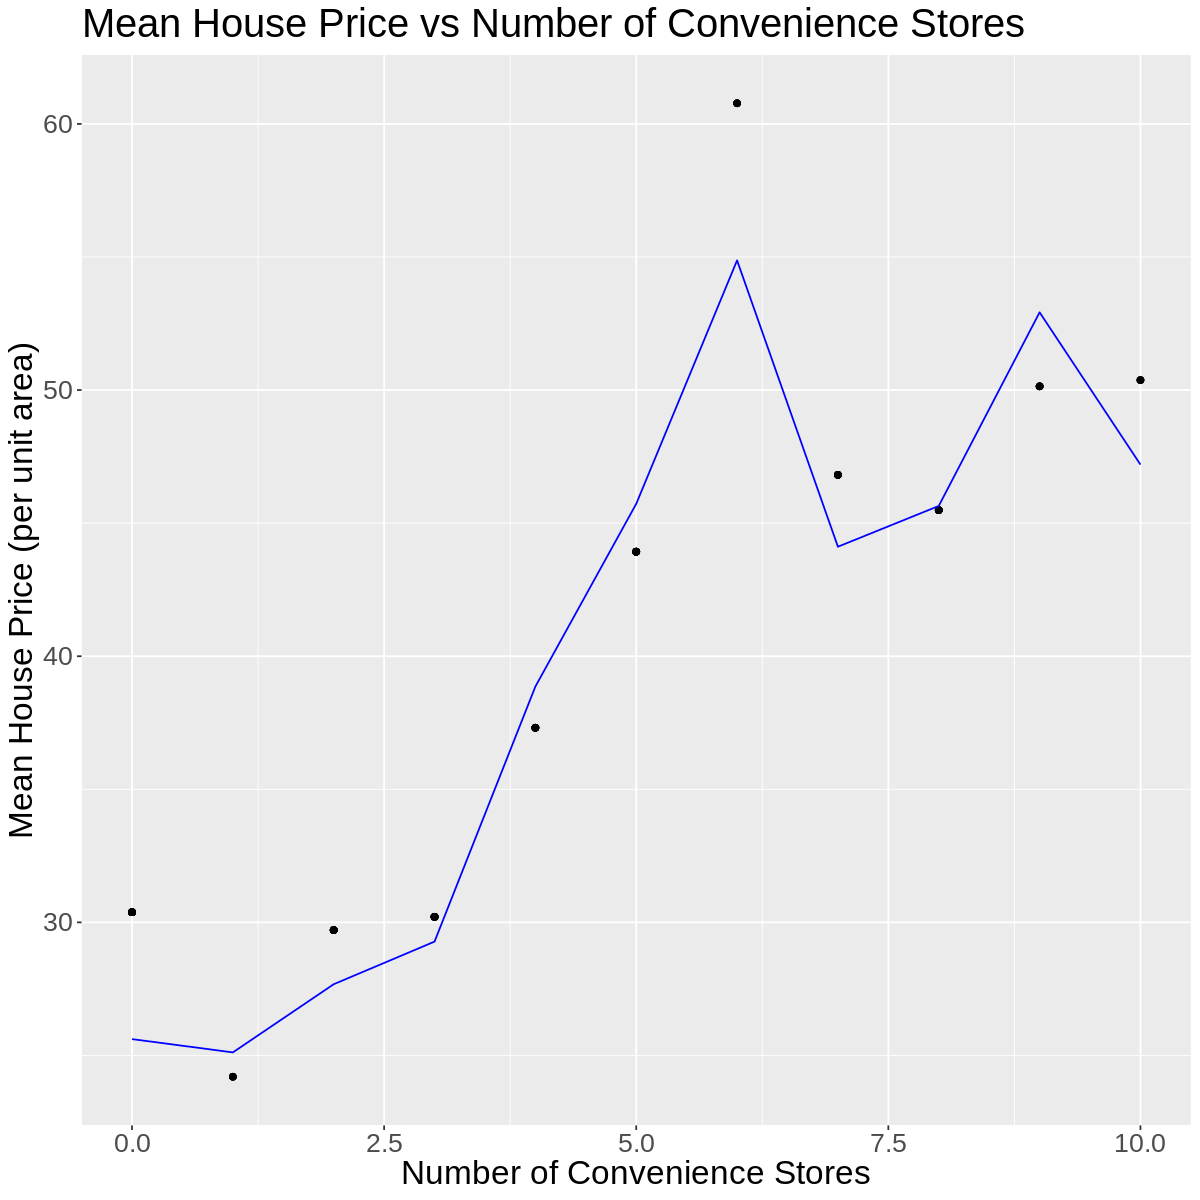

In [29]:
real_estate_knn_regression_mean 

Figure 2: Mean house price per unit area vs number of convenience stores overlayed with mean house prices predictions from our k-nn regression model (blue line).

Next, we wanted to visualize how our model did when using the distance to the nearest metrostation to predict the house price. Once again, we used our test data and our x value was the distance to the nearest metrostation and y was the house price per unit area. We overlayed this graph will our k-nn model so we could analyze how well our model performed using this predictor.

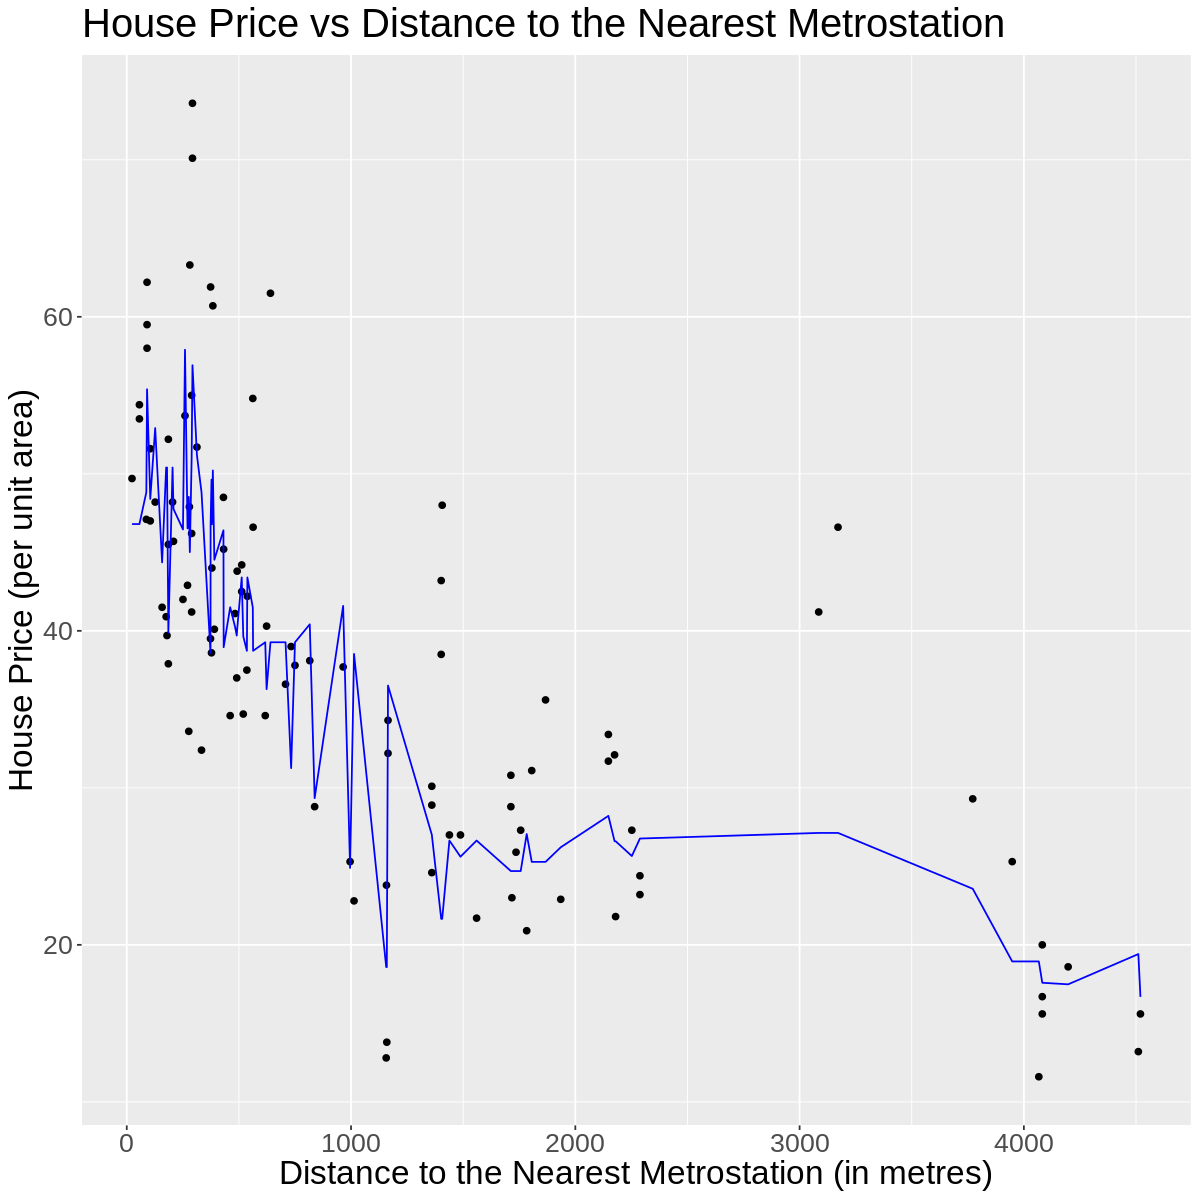

In [23]:
real_estate_knn_regression_2 <- real_estate_val_predictions %>%
    ggplot(aes(x = distance_to_the_nearest_MRT_station, y = house_price_per_unit_area)) +
    geom_point() +
    geom_line(aes(y = .pred), color = "blue") +
    labs (x = "Distance to the Nearest Metrostation (in metres)", y ="House Price (per unit area)")+
    ggtitle ("House Price vs Distance to the Nearest Metrostation")+
    theme(text = element_text (size = 20))

real_estate_knn_regression_2

Figure 3: House price per unit area vs distance to the nearest metrostation (in metres) overlayed with the predicted house price per unit are based on the k-nn regression model (blue line).

Finally, we wanted to visualize how much our predicted house prices values deviated from the actual house prices in order to further see how well our model performed. Hence, we made a scatterplot with x being our actual house price and y being the predicted house price. We graphed the line of best fit and the line y = x to see our model did including determining whether there was a certain range of house prices where it overpredicted and when it underpredicted.

`geom_smooth()` using formula 'y ~ x'



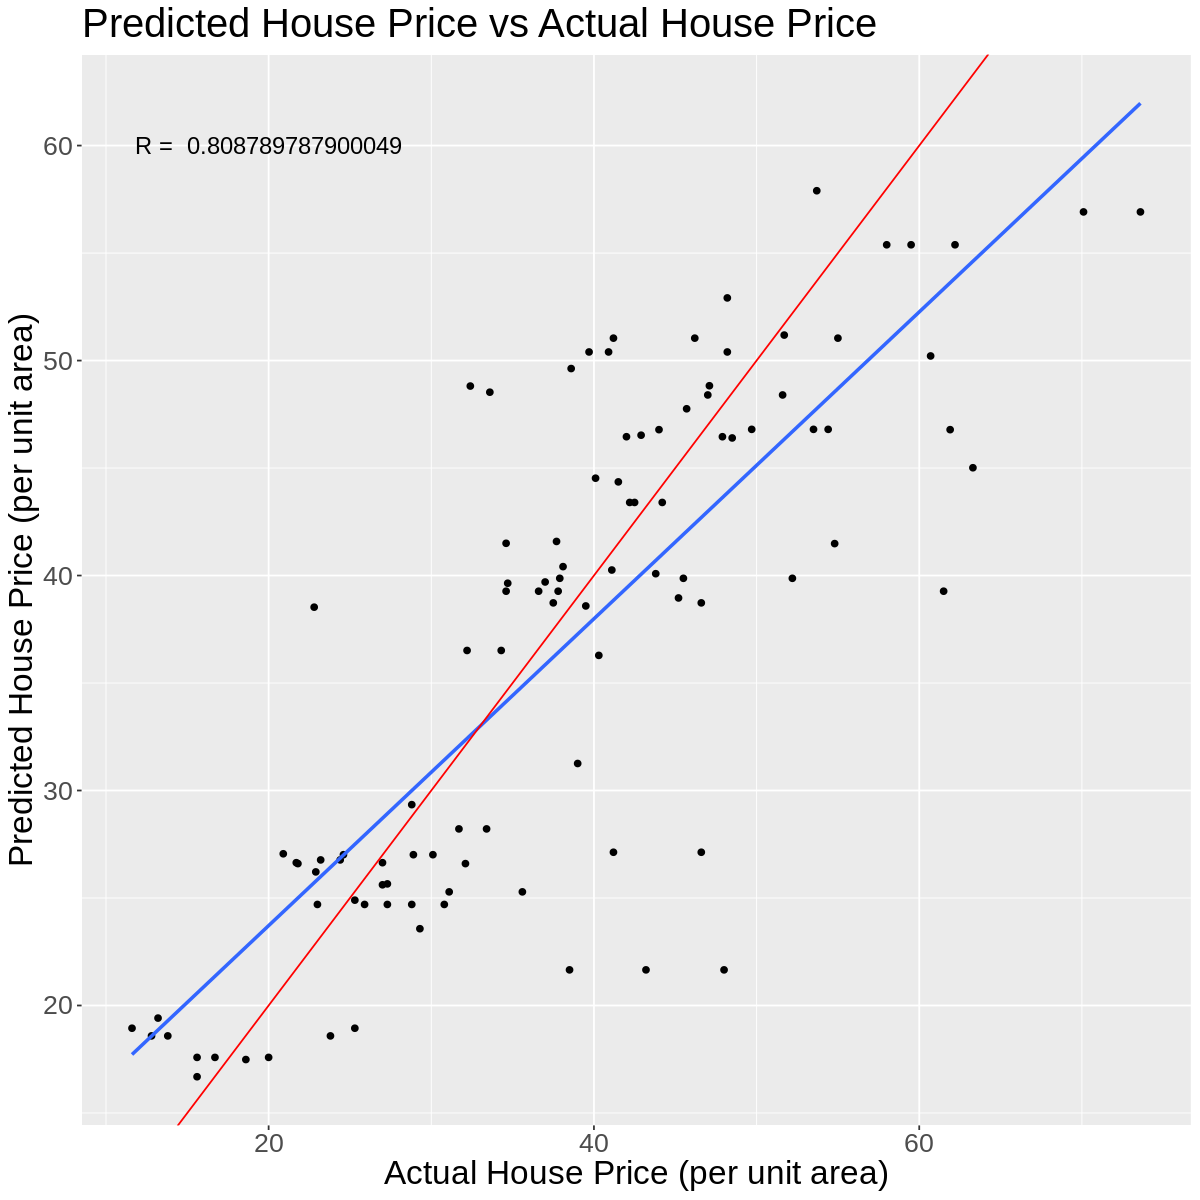

In [24]:
correlation <- cor(real_estate_val_predictions$house_price_per_unit_area, real_estate_val_predictions$.pred)
predicted_vs_actual_plot <- real_estate_val_predictions %>%
    ggplot(aes(x = house_price_per_unit_area, y = .pred)) +
    geom_point() +
    geom_smooth(method = 'lm', se = FALSE) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs (x = "Actual House Price (per unit area)", y ="Predicted House Price (per unit area)")+
    ggtitle ("Predicted House Price vs Actual House Price")+
    theme(text = element_text (size = 20)) + 
    annotate("text", x = 20, y = 60, label = paste("R = ", correlation), size = 5)


predicted_vs_actual_plot

Figure 4: Predicted house prices from the k-nn regression model vs actual house prices. Blue line shows the best fit line through the data points. Red line shows the line y = x.

## Discussion

#### Summary

As real estate prices across the world rises, we wanted to investigate some possible factors that would influence the final sale price of a house. To determine what the best model for our data analysis would be, we created two different models, one using k-nearest-neighbors regression and the other using linear regression. We found that using a k-nearest-neighbors model resulted in the lowest error, or root mean square prediction error, as opposed to a linear regression model. As a result, we decided to use the knn model as our main predictive model. We visualized our results from knn on three different plots. 

In Figure 2, we saw that there was a strong positive nonlinear relationship between the number of convenience stores near the house and the price per unit area of the house. From this plot you can see as convenience stores increase, the house price per unit area also increases, however the trend is noisy as it tends to jump around. 

In Figure 3, we saw a strong negative nonlinear relationship between the distance to the nearest metro station and the price per unit area of the house. In this plot you see a strong decreasing trend as distance to a metro station increased and the trend was quite noisy. In addition, we noticed that our predictive model was overfitting slightly even though we used cross validation to find the optimal K value. 

In Figure 4, we plotted our predicted values against the actual prices in our test dataset. Our predictions were generally accurate and centered around the center line, however there were a few outlying points and our prediction became less accurate as we moved further from the intersection point. We also see that as we approach the intersection of best fit lines from lower values before the intersection, the predictions from our model were overestimates, however after the intersection at the point approximately 34, our predictions were underestimates. 

To summarize, as the number of convenience stores increase and the distance to metro stations decrease, the price per unit area of the house increases.


#### Expectations

We expected a negative linear correlation between the price of the house and the distance to a metro station. We assumed this because the vicinity to a metro station indicates that the property is located in a highly urbanized, densely populated area, making it more expensive. We also thought that there would be no apparent reason why the relationship would be non-linear, and therefore concluded it was linear. However, Figure 3 shows that the relationship between the distance to a metro station and the price of a house is nonlinear. In hindsight this can be explained as once a metro station as the farther away you are from a metro station, the more significant each extra meter becomes.

We also thought that there would be a positive nonlinear correlation between the number of stores near the house, this is because having nearby stores makes people more willing to pay a higher price since having them nearby makes them more convenient. And we believed it would have a nonlinear relationship because once you have a store, the next store will bring diminishing benefits, thus creating a nonlinear, positive, relationship. Figure 2 confirms what we expected to find, a positive non-linear correlation.

Finally, for the whole model we expected KNN-regression would be more effective than linear regression, because of the nonlinear relationship in stores would make the trend nonlinear. This ended up being true, as shown by the lower RMSPE in KNN regression, but distance to the nearest metro also contributed to the non-linear nature of the results.


#### Impact

Markets can often be inefficient in the allocation of resources due to human emotion. “Market inefficiencies exacerbate the fear and greed of investors, causing them to buy high and sell low.” Fear or excitement can severely influence real estate prices regardless of the true value of the underlying property. By using our model we can find the true value of properties, based on their characteristics, and then compare the predicted valuation with the market price. This can help consumers take advantage when markets are being fearful, and undervaluing properties, or avoid deals when the markets are overvaluing properties, due to excitement.   

#### Future Questions

Finally, the results can lead to other interesting questions: what other variables can make our predictions more accurate? Does the model work in other cities? It could also potentially be used to create an index, such as the Case-Shiller home price indices, to determine whether the market is fairly priced. 


## Citations

Cheng, Yeh. “Real estate valuation data set Data Set.” UC Irvine Machine Learning Repository, 
18 Aug, 2018, https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set.
Accessed 20 Sept, 2020.

Johnson Robert R.  “How Irrational Markets Trick You (And What You Can Do About It)“
https://www.forbes.com/sites/chriscarosa/2020/06/05/how-irrational-markets-trick-you-and-what-you-can-do-about-it/?sh=3d79b3ed2f2f.  Accessed 4 Nov, 2020.


Yi-ling, Chen. “The factors and implications of rising housing prices in Taiwan.” Brookings, 15 July. 
2015,https://www.brookings.edu/opinions/the-factors-and-implications-of-rising-housing-price
s-in-taiwan/#:~:text=Since%202005%2C%20housing%20prices%20have,are%20rising%20al
l%20over%20Taiwan. Accessed 3 Nov, 2020.
